# Gallery <a id='top'></a>

The gallery contains standard plots you can make with the `crdb` Python library, that you can install with `pip install crdb`. 

Here is the list of example plots shown in this notebook:
  - **[B/C ratio](#BC_ratio)**
  - **[Electrons and positrons](#leptons)**
  - **[Anti-nuclei/nuclei (including $\bar{p}/p$)](#anti-nuclei)**
  - **[Flux of nuclei ($\lesssim$ PeV/n)](#gcr_fluxes)**
  - **[All CRs (MeV to ZeV)](#all_fluxes)**
  - **[Composition of very high energy CRs](#VHECR_compo)**
  - **[GCR vs SS elemental abundances](#GCR_vs_SS)**
  - **[Time series #1: AMS-02 and PAMELA electrons](#time_series1)**
  - **[Time series #2: e, He, $\phi_{\rm FF}$, and NM data](#time_series2)**
  - **[Dipole anisotropy](#dipole)**


*N.B.: if you use this notebook or the [CRDB website](https://lpsc.in2p3.fr/crdb), please cite the CRDB publications* (Maurin et al. [2014](https://ui.adsabs.harvard.edu/abs/2014A%26A...569A..32M), [2020](https://ui.adsabs.harvard.edu/abs/2020Univ....6..102M), 2023)

In [1]:
import crdb
from crdb.mpl import draw_references, draw_table, draw_logo
from crdb.experimental import convert_energy
from crdb.units import TeV
import matplotlib.pyplot as plt
from matplotlib import cycler, colors as mcolors
from matplotlib.ticker import MultipleLocator, LogLocator
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares

print(f"CRDB version {crdb.__version__}")

CRDB version 0.9.1.dev1+g81ff8b6.d20230603


We define a common style for all plots.

In [2]:
cc = (
    # standard markers for our plots
    cycler(marker=["o", "s", "D", "v", "^", "<", ">"])
    * cycler(color=mcolors.TABLEAU_COLORS)
)

plt.rcParams["lines.markersize"] = 5
plt.rcParams["axes.prop_cycle"] = cc
plt.rcParams["figure.constrained_layout.use"] = True


def format_ten_power(val, _):
    x = np.log10(val)
    if abs(x) < 2:
        return f"{val:g}"
    return f"$10^{{{x:g}}}$"


savefig = True  # set to true to save all the plots below as svg and pdf

# Optional Jupyter magic command to show matplotlib plots as SVG images;
# produces crisp plots but notebook rendering may become very slow
# %config InlineBackend.figure_formats = ['svg']

N.B.: to get help on functions from `crdb` library... see [tutorial.ipynb](https://github.com/crdb-project/tutorial/blob/main/tutorial.ipynb)

## Boron to carbon ratio <a id='BC_ratio'></a>  ([go to top](#top))
We plot all data on B/C ratios in the DB and plot different experiments in different colors.

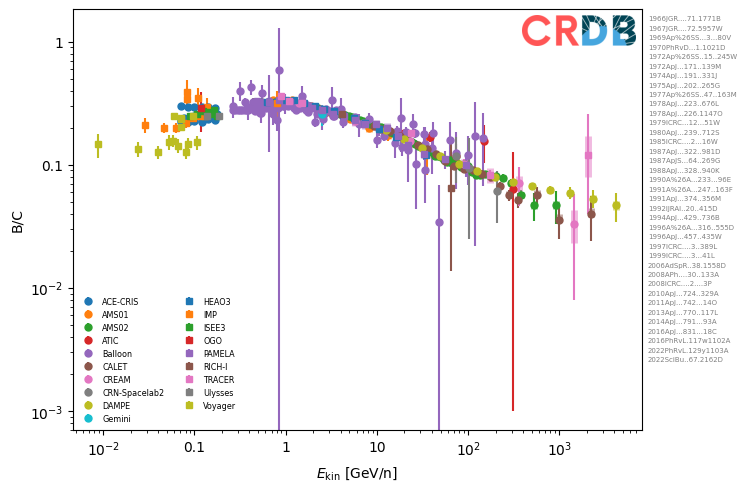

In [3]:
tab = crdb.query("B/C", energy_type="EKN")

plt.figure(constrained_layout=False)
plt.subplots_adjust(right=0.85, top=0.99, bottom=0.1)

# plot each experiment with different color
for exp, mask in crdb.experiment_masks(tab).items():
    t = tab[mask]
    if len(t) == 0:
        continue
    draw_table(t, label=exp)

plt.legend(ncol=2, frameon=False, loc="lower left", fontsize="xx-small")
plt.xlabel(r"$E_\mathrm{kin}$ [GeV/n]")
plt.ylabel("B/C")
plt.loglog()
plt.gca().xaxis.set_major_formatter(format_ten_power)
plt.gca().yaxis.set_major_formatter(format_ten_power)
draw_references(
    tab, loc="upper left", bbox_to_anchor=(1, 1), fontsize=5, columnspacing=0.3
)
draw_logo(0.78, 1)
if savefig:
    plt.savefig("figure/boron_to_carbon.svg")
    plt.savefig("figure/boron_to_carbon.pdf")

Now we show only experiments which have published both statistical and systematic uncertainties. This is an effective way to remove old data of uncertain quality.

We also fit the data with an empirical model that adds a Gaussian in log(energy)-space to a power law.

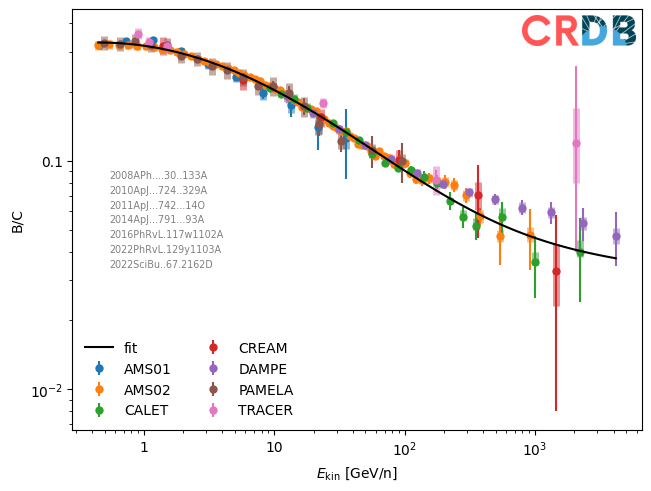

In [4]:
tab = crdb.query("B/C", energy_type="EKN")

# select only entries with systematic uncertainties
mask = tab.err_sys[:, 1] > 0
tab = tab[mask]

for exp, mask in crdb.experiment_masks(tab).items():
    t = tab[mask]
    draw_table(t, label=exp)

# fit data


def model(x, amp1, gamma, amp2, mu, sigma):
    return amp1 * x**gamma + amp2 * np.exp(
        -0.5 * (np.log(x) - np.log(mu)) ** 2 / sigma
    )


lsq = LeastSquares(tab.e, tab.value, np.mean(tab.err_sta, axis=1), model)

m = Minuit(lsq, amp1=0.3, gamma=-0.3, amp2=0.5, mu=1, sigma=1)
m.limits["amp1", "amp2", "sigma"] = (0, np.inf)
m.limits["mu"] = (0.1, 10)
m.limits["gamma"] = (-1, 0)
m.migrad()

# draw fit
xm = np.geomspace(np.min(tab.e), np.max(tab.e), 100)
plt.plot(xm, model(xm, *m.values), "-k", zorder=4, label="fit")

# add axis labels, references, legend, logo
plt.xlabel(r"$E_\mathrm{kin}$ [GeV/n]")
plt.ylabel("B/C")
plt.legend(ncol=2, frameon=False, loc="lower left")
plt.loglog()
plt.gca().xaxis.set_major_formatter(format_ten_power)
plt.gca().yaxis.set_major_formatter(format_ten_power)
draw_references(tab, loc="center left", bbox_to_anchor=(0.05, 0.5), fontsize="x-small")
draw_logo(0.78, 1)
if savefig:
    plt.savefig("figure/boron_to_carbon_2.svg")
    plt.savefig("figure/boron_to_carbon_2.pdf")

You can generate a list of URLs to the papers for the current table.

In [5]:
for url in crdb.reference_urls(tab):
    print(url)

https://ui.adsabs.harvard.edu/abs/2008APh....30..133A
https://ui.adsabs.harvard.edu/abs/2010ApJ...724..329A
https://ui.adsabs.harvard.edu/abs/2011ApJ...742...14O
https://ui.adsabs.harvard.edu/abs/2014ApJ...791...93A
https://ui.adsabs.harvard.edu/abs/2016PhRvL.117w1102A
https://ui.adsabs.harvard.edu/abs/2022PhRvL.129y1103A
https://ui.adsabs.harvard.edu/abs/2022SciBu..67.2162D


## Electron and positron fluxes  <a id='leptons'></a>  ([go to top](#top))

### Electrons + positrons

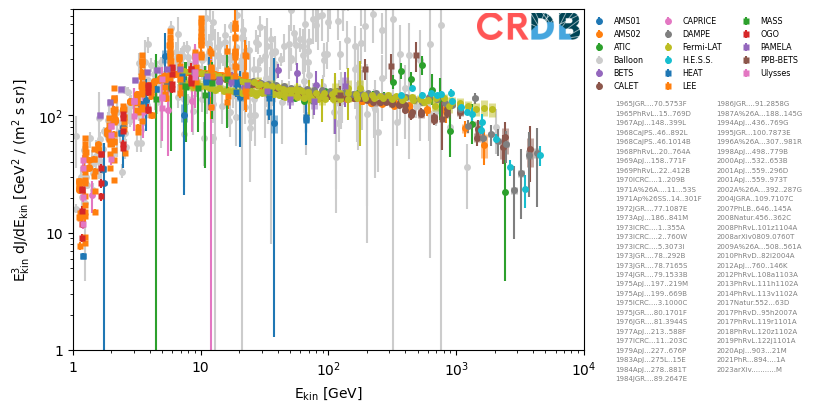

In [6]:
tab = crdb.query("e-+e+", energy_type="EK")

xlim = 1, 1e4
tab = tab[(xlim[0] < tab.e) & (tab.e < xlim[1])]

plt.figure(figsize=(8, 4))
for i, (exp, mask) in enumerate(crdb.experiment_masks(tab).items()):
    t = tab[mask]
    f = t.e**3
    if exp == "Balloon":
        zorder = 0
        color = "0.8"
    else:
        zorder = None
        color = None
    draw_table(t, factor=f, label=exp, zorder=zorder, mec="none", color=color)

plt.xlim(*xlim)
plt.ylim(1, 8e2)
plt.xlabel(r"E$_\mathrm{kin}$ [GeV]")
plt.ylabel(r"E$_\mathrm{kin}^3$ dJ/dE$_\mathrm{kin}$ [GeV$^2$ / (m$^2$ s sr)]")
plt.legend(fontsize="xx-small", ncol=3, frameon=False, bbox_to_anchor=(1, 1))
plt.loglog()
plt.gca().xaxis.set_major_formatter(format_ten_power)
plt.gca().yaxis.set_major_formatter(format_ten_power)
draw_references(tab, ncol=2, bbox_to_anchor=(1.05, 0.75), fontsize=5)
draw_logo(0.78, 1)
if savefig:
    plt.savefig("figure/electrons_and_positrons.svg")
    plt.savefig("figure/electrons_and_positrons.pdf")

### Positron fraction

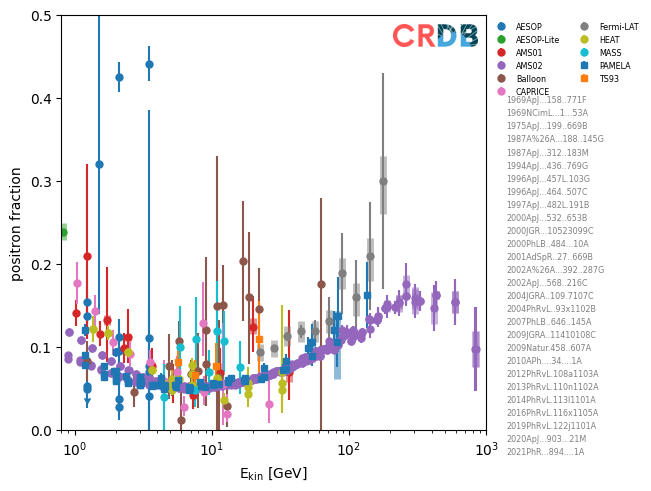

In [7]:
tab = crdb.query("e+/e-+e+", energy_type="EK")

xlim = 0.8, 1e3
tab = tab[(xlim[0] < tab.e) & (tab.e < xlim[1])]

for i, (exp, mask) in enumerate(crdb.experiment_masks(tab).items()):
    t = tab[mask]
    draw_table(t, label=exp)

plt.xlim(*xlim)
plt.ylim(0, 0.5)
plt.xlabel(r"E$_\mathrm{kin}$ [GeV]")
plt.ylabel("positron fraction")
plt.legend(
    fontsize="xx-small",
    ncol=2,
    framealpha=1,
    bbox_to_anchor=(1, 1),
    frameon=False,
    loc="upper left",
)
plt.semilogx()
draw_references(tab, bbox_to_anchor=(1.03, -0.08), loc="lower left")
draw_logo(0.77, 1)
if savefig:
    plt.savefig("figure/positron_fraction.svg")
    plt.savefig("figure/positron_fraction.pdf")

### Electrons only, positrons only


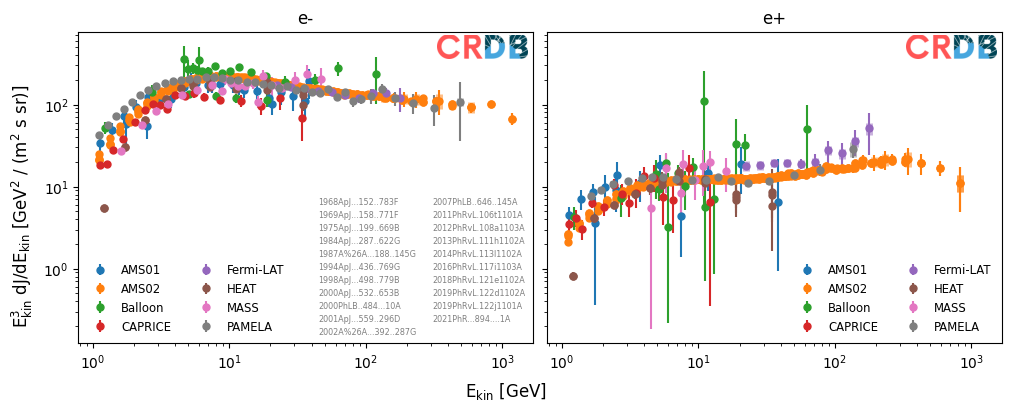

In [8]:
tab = crdb.query(("e-", "e+"), energy_type="EK")

xlim = 1, 1e4
tab = tab[(xlim[0] < tab.e) & (tab.e < xlim[1])]

fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
for quant, axi in zip(("e-", "e+"), ax):
    plt.sca(axi)
    tab2 = tab[tab["quantity"] == quant]
    for i, (exp, mask) in enumerate(crdb.experiment_masks(tab2).items()):
        t = tab2[mask]
        f = t.e**3
        draw_table(t, factor=f, label=exp)
        plt.title(quant)
fig.supxlabel(r"E$_\mathrm{kin}$ [GeV]")
fig.supylabel(r"E$_\mathrm{kin}^3$ dJ/dE$_\mathrm{kin}$ [GeV$^2$ / (m$^2$ s sr)]")
plt.loglog()
plt.sca(ax[0])
draw_references(tab, ncol=2, fontsize="xx-small", loc="lower right")
for axi in ax:
    plt.sca(axi)
    axi.legend(
        frameon=False,
        fontsize="small",
        ncol=2,
        loc="lower right" if axi is ax[1] else None,
    )
    draw_logo(0.78, 1)
if savefig:
    plt.savefig("figure/electrons_positrons.svg")
    plt.savefig("figure/electrons_positrons.pdf")

## Anti-nuclei/nuclei (including $\bar{p}/p$) <a id='anti-nuclei'></a>  ([go to top](#top))
We plot all $\bar{p}/p$ data points but also any existing $\bar{A}/A$ (or $\bar{Z}/Z$). Note that we do not plot the few existing $(Z\leq-2)/(Z\geq2)$, $(Z\leq-3)/(Z\geq3)$, and $(Z\leq-6)/(Z\geq6)$ data points.

/var/folders/tl/pv6mt7z17tz0stm1fjfg01cc0000gn/T/ipykernel_31409/2446950488.py:26: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(right=0.85, top=0.99, bottom=0.1)


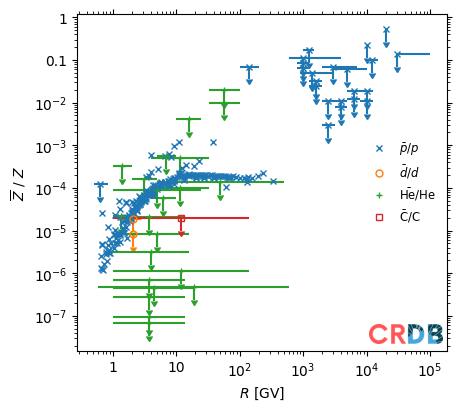

In [9]:
from matplotlib import container

# Retrieve all A-bar/A data (or upper limits). To be able to  get 2H-BAR/2H, we
# enable for 'combo_level=2' and 'energy_convert_level=2' (only 2H-BAR were
# natively published)
tab_dict = {}
antinuc_ratio = ["1H-bar/1H", "2H-bar/2H", "He-bar/He", "C-bar/C"]
# , 'Zgeq2-bar/Zgeq2', 'Zgeq3-bar/Zgeq3', 'Zgeq6-bar/Zgeq6']
antinuc_latex = [
    r"$\bar{p}/p$",
    r"$\bar{d}/d$",
    r"$\bar{\rm He}/$He",
    r"$\bar{\rm C}/$C",
]
# , r'$(Z\leq$-2)/$(Z\geq2)$', r'$(Z\leq$-3)/$(Z\geq3)$', r'$(Z\leq$-6)/(Z$\geq6)$']
markers = ["x", "o", "+", "s"]  # , 's', '<', '>']
colours = ["C0", "C1", "C2", "C3", "C4"]
for ratio in antinuc_ratio:
    tab_dict[ratio] = crdb.query(
        ratio, energy_type="R", combo_level=2, energy_convert_level=2
    )


# Plot each quantity with different color
plt.figure(figsize=(4.5, 4))
for i, ratio in enumerate(antinuc_ratio):
    tab = tab_dict[ratio]
    if i == 0:
        # If not upper limit
        tab_data = tab[~tab.is_upper_limit]
        plt.errorbar(
            tab_data.e,
            tab_data.value,
            fmt=markers[i],
            color=colours[i],
            linestyle="none",
            label=antinuc_latex[i],
            mfc="none",
        )
        # Upper limits
        tab_ul = tab[tab.is_upper_limit]
        xbin_lo = [tab_ul.e[k] - tab_ul.e_bin[k][0] for k in range(len(tab_ul.e_bin))]
        xbin_up = [tab_ul.e_bin[k][1] - tab_ul.e[k] for k in range(len(tab_ul.e_bin))]
        yerr_ul = 0.5 * tab_ul.value
        uplims = np.array([1] * len(tab_ul.e_bin), dtype=bool)
        plt.errorbar(
            tab_ul.e,
            tab_ul.value,
            xerr=[xbin_lo, xbin_up],
            yerr=yerr_ul,
            fmt=markers[i],
            color=colours[i],
            linestyle="none",
            mfc="none",
            uplims=uplims,
        )
    else:
        xbin_lo = [
            tab_dict[ratio].e[k] - tab_dict[ratio].e_bin[k][0]
            for k in range(len(tab_dict[ratio].e_bin))
        ]
        xbin_up = [
            tab_dict[ratio].e_bin[k][1] - tab_dict[ratio].e[k]
            for k in range(len(tab_dict[ratio].e_bin))
        ]
        yerr_ul = 0.5 * tab.value
        uplims = np.array([1] * len(tab_dict[ratio].e_bin), dtype=bool)
        plt.errorbar(
            tab.e,
            tab.value,
            xerr=[xbin_lo, xbin_up],
            yerr=yerr_ul,
            fmt=markers[i],
            color=colours[i],
            linestyle="none",
            label=antinuc_latex[i],
            mfc="none",
            uplims=uplims,
        )

# To remove error bars from markers in legend
handles, labels = plt.gca().get_legend_handles_labels()
new_handles = []
for h in handles:
    # only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
plt.legend(
    new_handles, labels, ncol=1, frameon=False, loc="center right", fontsize="small"
)

plt.xlabel("$R$ [GV]")
plt.ylabel(r"$\overline{Z}$ / $Z$")
plt.loglog()
plt.gca().xaxis.set_major_formatter(format_ten_power)
plt.gca().yaxis.set_major_formatter(format_ten_power)
plt.tick_params(which="both", top=True, right=True)
# draw_references(
#    tab, loc="upper left", bbox_to_anchor=(1, 1), fontsize=7, columnspacing=0.3
# )
draw_logo(0.78, 0.1)
if savefig:
    plt.savefig("figure/abar_a.svg")
    plt.savefig("figure/abar_a.pdf")

## Flux of nuclei ($\lesssim$ PeV/n) <a id='gcr_fluxes'></a>  ([go to top](#top))

In [10]:
xlim = 1e-2, 1e6

elements = {
    "H": 0,
    "He": -2,
    "C": -4,
    "O": -6,
    "Ne": -8,
    "Mg": -10,
    "Si": -12,
    "S": -14,
    "Ar": -16,
    "Ca": -18,
    "Fe": -21,
}

# apply cuts:

# select table entries with our elements
tabs = []
for elem in elements:
    tabs.append(crdb.query(elem, energy_type="EKN"))

tab = np.concatenate(tabs).view(np.recarray)
# use our energy range
tab = tab[(xlim[0] < tab.e) & (tab.e < xlim[1])]
# we don't want upper limits
tab = tab[~tab.is_upper_limit]
# statistical errors less than 100 %
tab = tab[np.mean(tab.err_sta, axis=1) / tab.value < 1]
# skip balloon data
mask = crdb.experiment_masks(tab)["Balloon"]
tab = tab[~mask]

len(tab)

2967

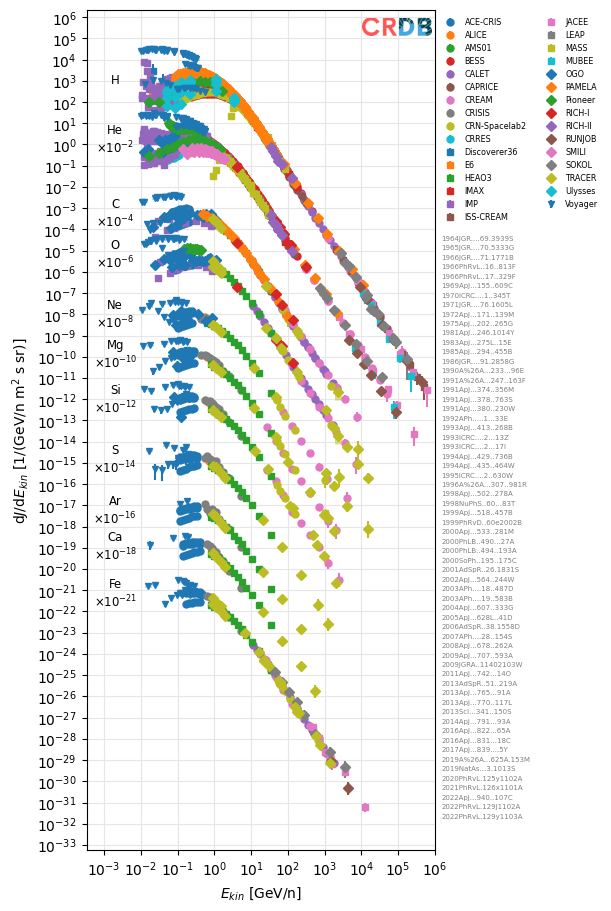

In [11]:
fig = plt.figure(figsize=(6, 9))
masks = crdb.experiment_masks(tab)
for exp in sorted(masks):
    t = tab[masks[exp]]
    first = True
    color = None
    marker = None
    for elem, fexp in elements.items():
        f = 10**fexp
        t2 = t[t.quantity == elem]
        if len(t2) == 0:
            continue
        l = draw_table(
            t2,
            factor=10**fexp,
            label=exp if first else None,
            color=color,
            marker=marker,
        )
        first = False
        color = l.get_color()
        marker = l.get_marker()

for elem, fexp in elements.items():
    t = tab[tab.quantity == elem]
    ymean = np.exp(np.mean(np.log(t[t.e < xlim[0] * 100].value))) * 10**fexp
    s = f"{elem}\n$\\times 10^{{{fexp}}}$" if fexp != 0 else f"{elem}"
    plt.text(2e-3, ymean, s, va="center", ha="center", fontsize="small")

plt.xlabel(r"$E_{kin}$ [GeV/n]")
plt.ylabel(r"d$J$/d$E_{kin}$ [1/(GeV/n m$^2$ s sr)]")
plt.legend(
    fontsize="xx-small", frameon=False, loc="upper left", ncol=2, bbox_to_anchor=(1, 1)
)
plt.grid(color="0.9")
plt.grid(which="minor", color="0.9")
plt.loglog()
plt.xlim(xlim[0] / 30, xlim[1])
plt.gca().yaxis.set_major_locator(LogLocator(numticks=100))
plt.gca().xaxis.set_major_locator(LogLocator(numticks=100))
draw_references(tab, fontsize=5, loc="lower left", bbox_to_anchor=(1, 0.03))
draw_logo(0.78, 1.03, zorder=5)
if savefig:
    plt.savefig("figure/low_energy_fluxes.svg")
    plt.savefig("figure/low_energy_fluxes.pdf")

## All CRs (MeV to ZeV) <a id='all_fluxes'></a>  ([go to top](#top))

We plot the fluxes of several elements, electrons and positrons, and the all-particle flux measured by air shower experiments (which cannot distinguish individual elements, only groups) as function of total energy. Out of all available elements, only some datasets are available as function of total energy.

We skip data points without published systematic uncertainties. We further skip data points with more than 50 % statistical uncertainty. These cuts remove some elements from the table altogether.

The plot on the left(right)-hand side shows the flux scaled with $E$ ($E^{2.6}$). Flux levels are shown with different shades of gray for reference. One can see that direct measurements, which typically have apertures around 1 square-meter, stop to be practical when the flux drops below the threshold of 1 event per square-meter and day.

We plot data with `e_type == "EK"` and `e_type == "ETOT"` into the same graph. This is valid here since kinetic energy approaches total energy for high momenta. The corresponding warning can be ignored.

/Users/hdembinski/Extern/crdb/src/crdb/mpl.py:52: RuntimeWarning: table contains potentially incompatbile e_types {'EK', 'ETOT'}
  warnings.warn(msg, RuntimeWarning)


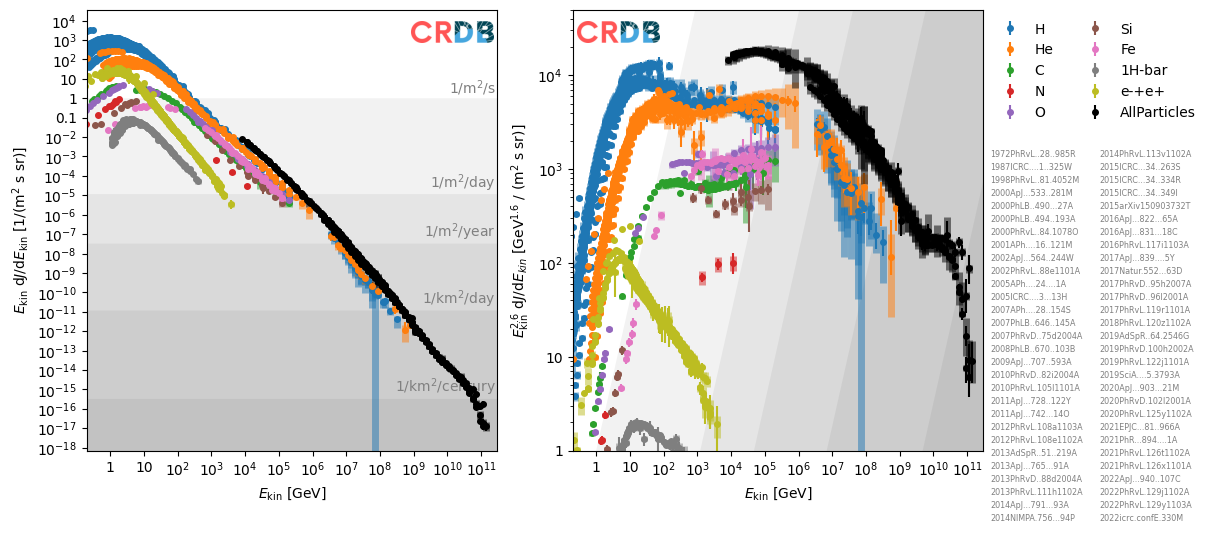

In [12]:
elements = ("H", "He", "C", "N", "O", "Si", "Fe")
elements += ("1H-bar", "e-+e+", "AllParticles")

tabs = []
for energy_type in ("EKN", "ETOT"):
    for elem in elements:
        tab = crdb.query(
            elem,
            energy_type=energy_type,
            energy_convert_level=1,
        )
        if energy_type == "EKN":
            tab = convert_energy(tab, "EK")
        tabs.append(tab)
tab = np.concatenate(tabs).view(np.recarray)

with np.errstate(divide="ignore"):
    mask = (tab.err_sys[:, 0] > 0) & (tab.err_sta[:, 0] / tab.value < 0.5)
tab = tab[mask]

exponents = (1, 2.6)

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 5))
for expo, axi in zip(exponents, ax):
    plt.sca(axi)
    for elem in elements:
        ma = tab.quantity == elem
        t = tab[ma]
        if len(t) == 0:
            continue
        f = t.e**expo
        color = "k" if elem == "AllParticles" else None
        draw_table(t, factor=f, color=color, label=elem, ms=4)
        if expo == 1:
            plt.ylabel(r"$E_\mathrm{kin}$ d$J$/d$E_\mathrm{kin}$ [1/(m$^2$ s sr)]")
        else:
            plt.ylabel(
                f"$E_\\mathrm{{kin}}^{{{expo}}}$ d$J$/d$E_{{kin}}$ "
                f"[GeV$^{{{expo - 1}}}$ / (m$^2$ s sr)]"
            )

m = 1
km = 1e3 * m
s = 1
hour = 60**2 * s
day = 24 * hour
month = 30 * day
year = 356 * day
century = 100 * year
x = np.geomspace(2e-1, 3e11, 1000)
for exponent, axi in zip(exponents, ax):
    axi.loglog()
    axi.set_xlabel("$E_\\mathrm{kin}$ [GeV]")
    axi.set_xlim(x[0], x[-1])
    for flux_ref in (
        "1/m^2/s",
        "1/m^2/day",
        "1/m^2/year",
        "1/km^2/day",
        "1/km^2/century",
    ):
        v = eval(flux_ref.replace("^2", "**2"))
        label = flux_ref.replace("^2", "$^2$")
        y = v * x ** (exponent - 1)
        axi.fill_between(x, y, color="k", zorder=0, alpha=0.05, lw=0)
        if axi is ax[0]:
            axi.text(
                x[-1] * 0.9,
                y[-1] * 1.1,
                label,
                va="bottom",
                ha="right",
                color="0.5",
                zorder=0,
            )

ax[1].legend(frameon=False, ncol=2, loc="upper left", bbox_to_anchor=(1, 1))
ax[1].set_ylim(1, 5e4)
draw_references(tab, bbox_to_anchor=(1, 0.7), ncol=2, loc="upper left")
plt.sca(ax[0])
ax[0].xaxis.set_major_locator(LogLocator(numticks=100))
ax[0].xaxis.set_major_formatter(format_ten_power)
ax[0].yaxis.set_major_locator(LogLocator(numticks=100))
ax[0].yaxis.set_major_formatter(format_ten_power)
ax[1].yaxis.set_major_formatter(format_ten_power)
draw_logo(0.78, 1)
plt.sca(ax[1])
draw_logo(0, 1)
if savefig:
    plt.savefig("figure/fluxes.svg")
    plt.savefig("figure/fluxes.pdf")

## Composition of very high energy CRs  <a id='VHECR_compo'></a>  ([go to top](#top))

We plot the composition of high-energy cosmic rays for experiments which measured four mass groups.

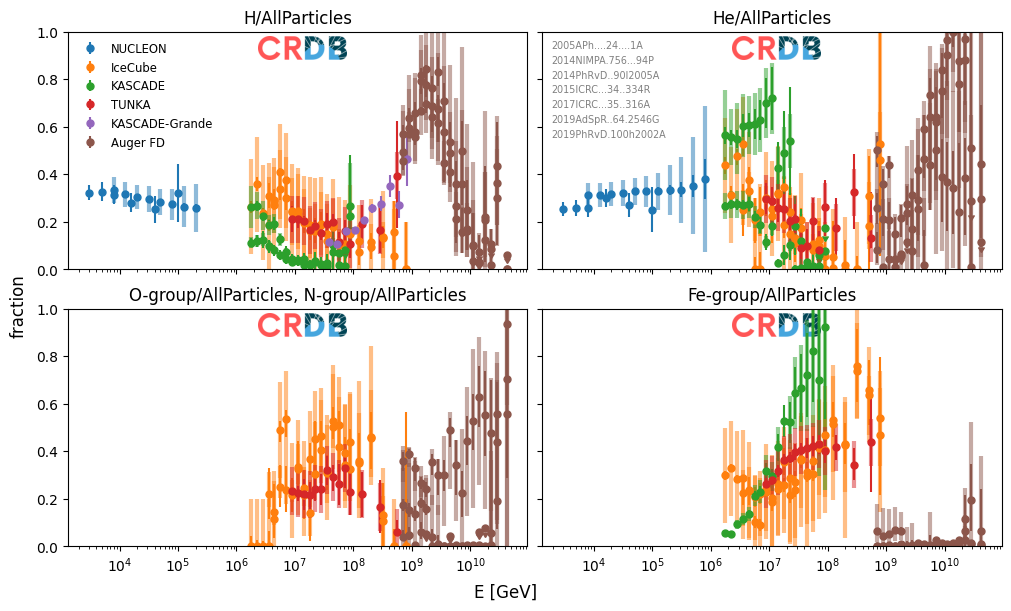

In [13]:
ratios = (
    "H/AllParticles",
    "He/AllParticles",
    "O-group/AllParticles",
    "N-group/AllParticles",
    "Fe-group/AllParticles",
)

tab = crdb.query(ratios, energy_type="ETOT", energy_convert_level=1)
tab = np.sort(tab, order=("e",))

fig, ax = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)

ratios = (
    "H/AllParticles",
    "He/AllParticles",
    ("O-group/AllParticles", "N-group/AllParticles"),
    "Fe-group/AllParticles",
)

for axi, ratio in zip(ax.flat, ratios):
    plt.sca(axi)
    if isinstance(ratio, tuple):
        ma = False
        for r in ratio:
            ma |= tab.quantity == r
    else:
        ma = tab.quantity == ratio
    for iexp, (exp, ma2) in enumerate(crdb.experiment_masks(tab).items()):
        t = tab[ma & ma2]
        draw_table(t, label=exp, color=f"C{iexp}", sys_lw=3)
    plt.title(ratio if isinstance(ratio, str) else ", ".join(ratio))

ax[0, 0].legend(fontsize="small", frameon=False)
fig.supxlabel("E [GeV]")
fig.supylabel("fraction")
plt.ylim(0, 1)
plt.semilogx()
plt.sca(ax[0, 1])
draw_references(tab, fontsize="x-small")
for axi in ax.flat:
    plt.sca(axi)
    draw_logo(0.4, 0.98)
if savefig:
    plt.savefig("figure/hecr_composition.svg")
    plt.savefig("figure/hecr_composition.pdf")

## GCR vs SS elemental abundances <a id='GCR_vs_SS'></a>  ([go to top](#top))

We plot the famous solar system (SS) versus Galactic cosmic-ray (GCR) composition, illustrating the some CRs are mostly of secondary origin (Li, Be, B, F, subFe...) or of primary origin (H, He, O, Si, Fe...)

In [14]:
tab = crdb.all()

In [15]:
# get all quantities which contain elements in numerator and denominator
elements = []
ratios = []
for q in np.unique(tab.quantity):
    if "/" in q:
        num, den = q.split("/")
        if num in crdb.ELEMENTS and den in crdb.ELEMENTS:
            ratios.append(q)
    else:
        if q in crdb.ELEMENTS:
            elements.append(q)

# keep only ratios if no data is available for element in pure form
ratios = [x for x in ratios if (x.split("/")[0] not in elements)]

# apply cuts below

# select table entries with elements
mask = False
for q in elements + ratios:
    mask |= tab.quantity == q
tab = tab[mask]
# we don't want upper limits
tab = tab[~tab.is_upper_limit]
# statistical errors less than 100 %
tab = tab[np.mean(tab.err_sta, axis=1) / tab.value < 1]
# only measurements at 1 AU
tab = tab[tab.distance == 1]
# use EKN e_axis
tab = convert_energy(tab, "EKN")

# reference point for ratio measurement
xref = 20  # GeV
dlog10x = 0.5
xmin = 10 ** (np.log10(xref) - dlog10x)

# subset of table that we fit above minimum energy
tab_fit = tab[tab.e > xmin]

# ratios of ultra-heavy elements are below xmin, keep them separate
mask = False
for q in ratios:
    num, den = q.split("/")
    if den not in elements:
        continue
    mask |= tab.quantity == q
tab_ratio = tab[mask]

tab_all = np.concatenate([tab_fit, tab_ratio]).view(np.recarray)

Perform fits to get flux for each element at the reference point. The following plot is not for the public, it validates the fits.

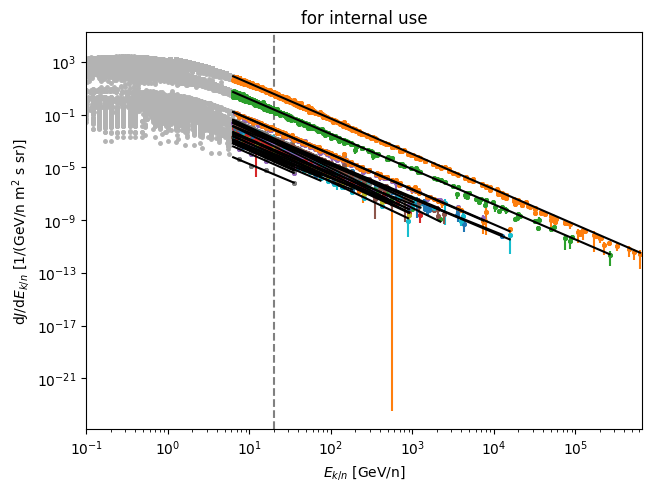

In [16]:
def model(x, log_j, gamma):
    return log_j - gamma * np.log(x / xref)


jref = {}

for q in elements:
    t = tab[tab.quantity == q]
    t2 = tab_fit[tab_fit.quantity == q]
    if len(t2) < 2:
        continue

    # prepare arrays for fitting
    x = t2.e
    y = t2.value
    ye1 = np.mean(t2.err_sta, axis=1)
    ye2 = np.mean(t2.err_sys, axis=1)
    ye = np.sqrt(ye1**2 + ye2**2)

    # get starting value for fit
    t3 = t2[np.abs(np.log10(t2.e) - np.log10(xref)) < dlog10x]
    log_j0 = np.mean(np.log(t3.value))

    # run least-squares fit using MINUIT
    c = LeastSquares(x, np.log(y), ye / y, model)
    m = Minuit(c, log_j0, 2.7)
    m.migrad()
    assert m.valid

    # generate points for the fitted line for validation
    xm = np.geomspace(xmin, np.max(t.e))
    ym = np.exp(model(xm, *m.values))

    # compute fitted flux at reference point and uncertainty,
    # apply chi2/ndof scaling of uncertainties to account for
    # systematic offsets between data sets
    jref1 = np.exp(m.values["log_j"])
    jref1_err = m.errors["log_j"] * jref1 * m.fmin.reduced_chi2**0.5
    jref[q] = (jref1, jref1_err)

    # plot everything
    plt.plot(t.e, t.value, ".", zorder=0, color="0.7")
    l = plt.plot(t2.e, t2.value, ".")[0]
    plt.errorbar(x, y, ye, fmt=".", color=l.get_color())
    plt.plot(xm, ym, "-k", zorder=4)

plt.xlim(1e-1, None)
plt.axvline(xref, color="0.5", ls="--")
plt.loglog()
plt.xlabel(r"$E_{k/n}$ [GeV/n]")
plt.ylabel(r"d$J$/d$E_{k/n}$ [1/(GeV/n m$^2$ s sr)]")
plt.title("for internal use");

Next, we visualize ratio data. This is not for the public but an internal plot for validation.

For the final plot, we compute the average ratio to get a single number if it was measured at several energies.

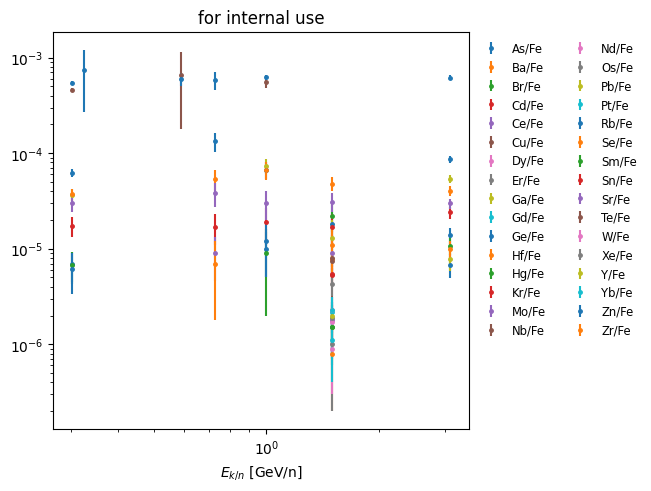

In [17]:
for q in ratios:
    t = tab_ratio[tab_ratio.quantity == q]
    if len(t) == 0:
        continue

    x = t.e
    y = t.value
    ye1 = np.mean(t.err_sta, axis=1)
    ye2 = np.mean(t.err_sys, axis=1)
    ye = np.sqrt(ye1**2 + ye2**2)

    plt.errorbar(x, y, ye, fmt=".", label=q)

    num, den = q.split("/")
    jden = jref[den][0]  # neglect uncertainty of denominator
    w = ye**-2
    cr = np.average(y, weights=w) * jden
    cre = np.sqrt(1 / np.sum(w)) * jden
    jref[num] = (cr, cre)

plt.legend(
    frameon=False, fontsize="small", ncol=2, bbox_to_anchor=(1, 1), loc="upper left"
)
plt.loglog()
plt.xlabel(r"$E_{k/n}$ [GeV/n]")
plt.title("for internal use");

Elemental abundances in cosmic rays at the reference energy compared to abundances in the solar system. The two sets of abundances are scaled so that silicon has a (arbitrary) abundance of $10^6$ in both sets.

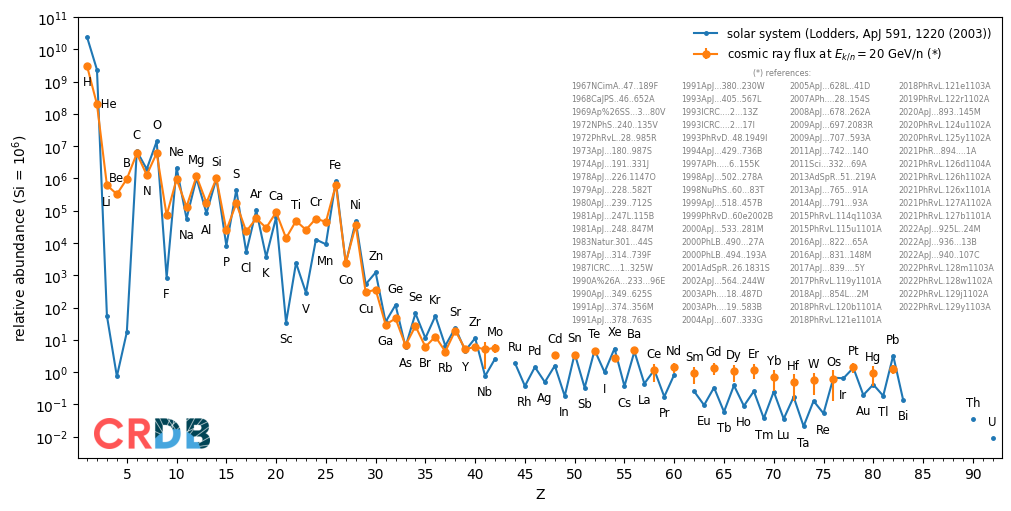

In [18]:
solar_system_composition = crdb.solar_system_composition()

# normalize cosmic ray abundances so that Si = 1e6
jref0 = jref["Si"][0]
scaling = 1e6 / jref0

data = []
for el, z in crdb.ELEMENTS.items():
    if el in solar_system_composition:
        isotopes = solar_system_composition[el]
        ss = sum(x[1] for x in isotopes)
    else:
        ss = np.nan
    cr, cre = jref.get(el, (np.nan, np.nan))
    data.append((z, cr * scaling, cre * scaling, ss))
data.sort(key=lambda x: x[0])

x, cr_y, cr_ye, ss_y = np.transpose(data)
elements = [[k for k, v in crdb.ELEMENTS.items() if v == z][0] for z in x]

plt.figure(figsize=(10, 5))
plt.plot(x, ss_y, "-", marker=".", label="solar system (Lodders, ApJ 591, 1220 (2003))")
plt.errorbar(
    x,
    cr_y,
    cr_ye,
    fmt="o-",
    label="cosmic ray flux at $E_{k/n} = " + f"{xref}$ GeV/n (*)",
)
for eli, xi, yi, y2i in zip(elements, x, cr_y, ss_y):
    if np.isnan(yi) and np.isnan(y2i):
        continue
    if xi == 2:
        plt.text(xi, yi, f" {eli}", ha="left", va="center", fontsize="small")
        continue
    if xi == 3:
        plt.text(xi, yi * 0.5, f"{eli}", ha="center", va="top", fontsize="small")
        continue
    if xi % 2 == 1 and xi not in (5,):
        y = np.nanmin((yi, y2i)) * 0.5
        va = "top"
    else:
        y = np.nanmax((yi, y2i)) * 2
        va = "bottom"
    plt.text(xi, y, f"{eli}", ha="center", va=va, fontsize="small")
plt.legend(frameon=False, fontsize="small")
plt.xlim(0.1, np.max(x[~np.isnan(ss_y)]) + 0.9)
plt.xlabel("Z")
plt.ylabel("relative abundance (Si = $10^6$)")
plt.semilogy()
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
plt.gca().xaxis.set_minor_locator(MultipleLocator())
plt.gca().yaxis.set_major_locator(LogLocator(numticks=100))
draw_references(
    tab_all,
    loc="upper right",
    bbox_to_anchor=(1, 0.9),
    title="(*) references:",
    fontsize="xx-small",
    ncol=4,
)
draw_logo(0, 0.09, height=0.07)
if savefig:
    plt.savefig("figure/cosmic_ray_vs_solar_abundances.svg")
    plt.savefig("figure/cosmic_ray_vs_solar_abundances.pdf")

## Time series #1: AMS-02 and PAMELA electrons  <a id='time_series1'></a>  ([go to top](#top))

We plot a time series (i.e. data shown vs time) of selected energy bands for electrons fluxes, using AMS-02 (daily average) fluxes and PAMELA (biannual average) data.

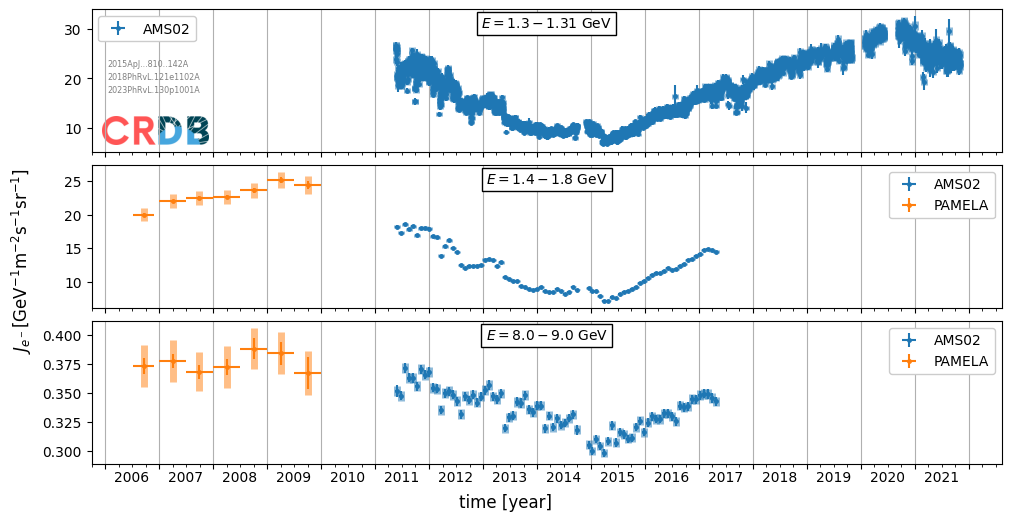

In [19]:
from datetime import date
import matplotlib.dates as mdates
from crdb.mpl import draw_timeseries

tab = crdb.query("e-", energy_type="Ek", time_series="only")

erange = [
    [1.30, 1.31],
    [1.4, 1.8],
    [8.0, 9.0],
]  ## example for three energy ranges to be plotted
n_eranges = len(erange)
fig, axs = plt.subplots(n_eranges, 1, figsize=(10, 1.7 * n_eranges), sharex=True)
for ax, (elo, ehi) in zip(axs, erange):
    t1 = tab[
        (elo < tab["e"])
        & (tab["e"] < ehi)
        & (tab["distance"] > 0.95)
        & (tab["distance"] < 1.05)
    ]  ## select data with mean energy in energy range and also at 1 au (we do not want IS data)        (elo < tab["e"]) & (tab["e"] < ehi)
    for i, (exp, mask) in enumerate(crdb.experiment_masks(t1).items()):
        t2 = t1[mask]  ## select data from one experiment
        plt.sca(ax)
        draw_timeseries(t2, label=exp, show_bin=True)  ## plot time series
    ax.text(
        0.5,
        0.95,
        f"$E = {elo}-{ehi}$ GeV",
        transform=ax.transAxes,
        verticalalignment="top",
        horizontalalignment="center",
        bbox=dict(boxstyle="square", facecolor="white"),
    )
    ax.xaxis.set_major_locator(mdates.YearLocator(base=1, month=1))
    ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
    ax.set_xticklabels([])  ## remove tick labels
    ax.grid(axis="x")  ## show x-grid only
    ax.legend(framealpha=1)
minyear = mdates.num2date(ax.get_xlim()[0]).year + 1  ## earliest year
maxyear = mdates.num2date(ax.get_xlim()[1]).year  ## latest year
for year in range(minyear, maxyear):
    axs[n_eranges - 1].text(
        date(year, 7, 1),  ## plot year in centred position
        0.98 * axs[n_eranges - 1].get_ylim()[0],
        "%d" % year,
        verticalalignment="top",
        horizontalalignment="center",
    )
fig.supxlabel("time [year]")
fig.supylabel(
    r"$J_{e^-} [\mathrm{GeV}^{-1}\mathrm{m}^{-2}\mathrm{s}^{-1}\mathrm{sr}^{-1}]$"
)
plt.sca(axs[0])
draw_references(
    tab,
    loc="upper left",
    bbox_to_anchor=(0.01, 0.7),
    fontsize="xx-small",
)
draw_logo(-0.14, 0.25, height=0.2)
if savefig:
    plt.savefig("figure/time_series.svg")
    plt.savefig("figure/time_series.pdf")

## Time series #2: e, He, $\phi_{\rm FF}$, and NM data <a id='time_series2'></a>  ([go to top](#top))

We plot lepton data measured over 50 years by LEE, AESOP, and AESOP-Lite. We also show neutron monitor (NM) data from [NMDB](https://www.nmdb.eu) as measured by different NM stations during the same period, and Solar modulation parameter $\phi_{\rm FF}$ calculated from these NM data and available from [CRDB](https://lpsc.in2p3.fr/crdb):
   - If you use $\phi_{\rm FF}$ values in your publication, **please cite** [Ghelfi et al. (2017)](https://ui.adsabs.harvard.edu/abs/2017AdSpR..60..833G) and CRDB publications.
   - If you use NM data, **please acknolewdge** [NMDB](https://www.nmdb.eu) as indicated [here](https://www.nmdb.eu/nest/statements.html)

/Users/hdembinski/Extern/crdb/src/crdb/mpl.py:116: RuntimeWarning: input contains 4 points with multiple time ranges, we use minimum and maximum to construct an interval
  warnings.warn(msg, RuntimeWarning)
/Users/hdembinski/Extern/crdb/src/crdb/mpl.py:116: RuntimeWarning: input contains 15 points with multiple time ranges, we use minimum and maximum to construct an interval
  warnings.warn(msg, RuntimeWarning)


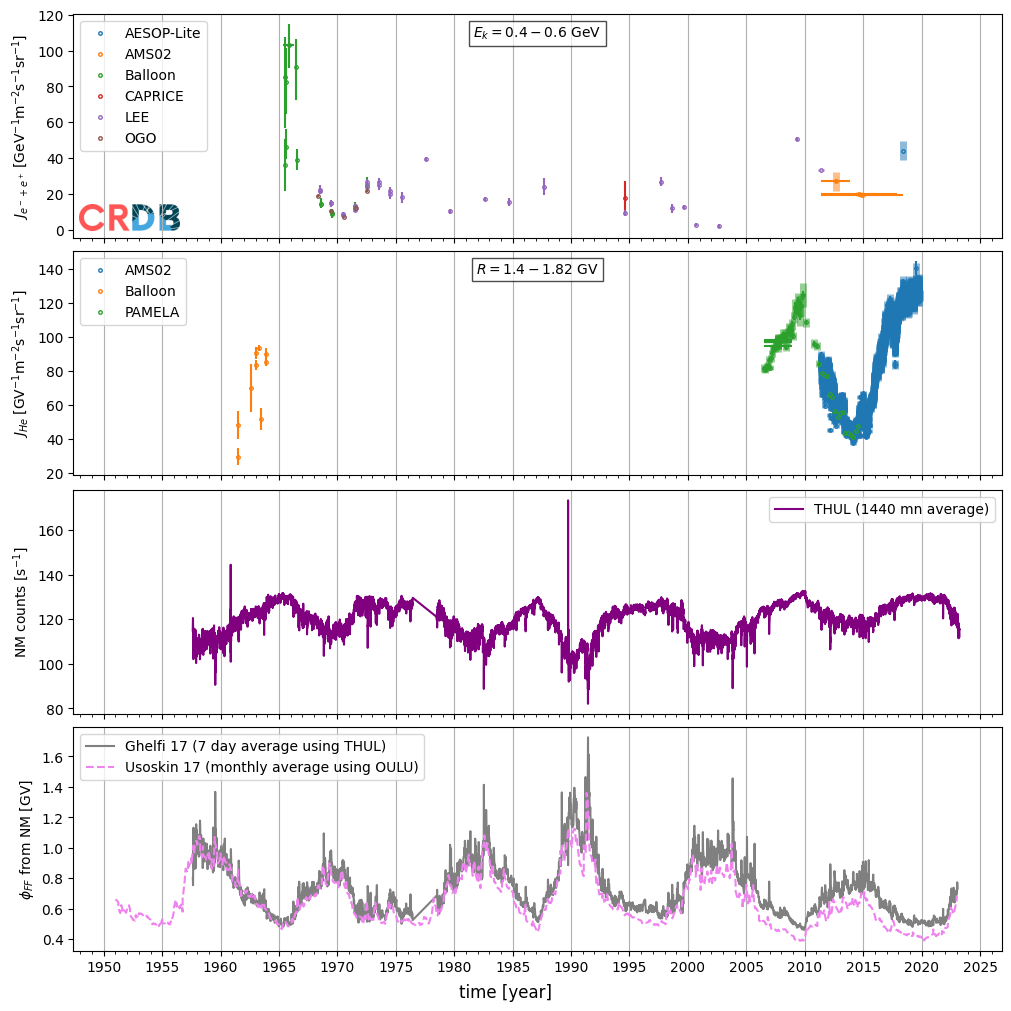

In [20]:
import os
import re
import math
from pathlib import Path
from datetime import datetime
import matplotlib.dates as mdates
from crdb.mpl import draw_timeseries
from matplotlib import container

# import boost_histogram as bh

# I. Retrieve various data sets
# -------------------------------
#   - electron+positron data
tab_e = crdb.query("e-+e+", energy_type="Ek", time_series="all")
#   - He data (we enable approximate E-axis conversion, energy_convert_level=2, to also get old balloon data in R)
tab_He = crdb.query("He", energy_type="R", energy_convert_level=2, time_series="all")

# II. Retrieve and load NM count rates (from NMDB)
# -------------------------------------------------
# Our colleagues at the neutron monitor data base (NMDB) provide a NEST interface
# (https://www.nmdb.eu/nest/help.php#helptres), which is used here to get NM counts.
# The NEST interface has the following self-explaining parameters:
# Load NM count rates
outfile_NM = Path("nm_counts.dat")
station_NM = "THUL"
t_res_mn = "1440"  # 1 day
start_year = "1950"
start_month = "1"
start_day = "1"
start_hour = "00"
start_min = "00"
end_year = "2023"
end_month = "4"
end_day = "1"
end_hour = "00"
end_min = "00"
if not outfile_NM.exists():
    cmd = f"curl -L 'http://www.nmdb.eu/nest/draw_graph.php?wget=1&stations[]={station_NM}&output=ascii&tabchoice=ori&dtype=corr_for_efficiency&tresolution={t_res_mn}&date_choice=bydate&start_year={start_year}&start_month={start_month}&start_day={start_day}&start_hour={start_hour}&start_min={start_min}&end_year={end_year}&end_month={end_month}&end_day={end_day}&end_hour={end_hour}&end_min={end_min}&yunits=0' > {outfile_NM}"
    print(cmd)
    os.system(cmd)

nm_counts = {"datime": [], "counts": []}
with open(outfile_NM) as file:
    for line in file:
        x = line.strip().split(";")
        if len(x) < 2 or x[1] == "null":
            continue
        tmp = x[0].replace("-", "/").replace(" ", "-").replace(":", "")
        nm_counts["datime"].append(datetime.strptime(tmp, "%Y/%m/%d-%H%M%S"))
        nm_counts["counts"].append(float(x[1]))


# III. Retrieve and load phi_FF values
# --------------------------------------
# -> From CRDB's REST interface (see CRDB 'Solar modulation' tab), whose parameters are
#    Parameter   Description                                Default
#    stations    Comma-separated list of NM stations        OULU
#    date_start  Start date YYYY/MM/DD                      2011/05/19
#    time_start  Start time HH-MM                           00-00
#    date_stop   Stop date YYYY/MM/DD                       2020/04/27
#    time_stop   Stop time HH-MM                            00-00
#    dt          Time resolution to calculate (integer) Φ   1
#    dt_unit(a)  mn, hr, day, or week 	day
# N.B.: these values are calculated
station_phi = "THUL"
date_start = "1950/01/02"
date_stop = "2023/02/01"
dt = "7"
dt_unit = "day"
outfile_phi = Path("phi_Ghelfi17.dat")
if not outfile_phi.exists():
    cmd = f"curl -L 'http://lpsc.in2p3.fr/crdb/rest_phi.php?stations={station_phi}&date_start={date_start}&date_stop={date_stop}&dt={dt}&dt_unit={dt_unit}' > {outfile_phi}"
    print(cmd)
    os.system(cmd)

# Load phi_Ghelfi17 data
phi_ghelfi17 = {"datime": [], "phi": []}
with open(outfile_phi) as file:
    for line in file:
        x = line.strip().split()
        if len(x) < 3 or x[0] == "#" or x[2] == "null":
            continue
        tmp = x[0].replace("-", "/") + "-" + x[1].replace(":", "")
        phi_ghelfi17["datime"].append(datetime.strptime(tmp, "%Y/%m/%d-%H%M%S"))
        phi_ghelfi17["phi"].append(float(x[2]))


# N.B.: one can also download the widely used Usoskin et al. (2005,2017) values
# => Monthly average (only), either from Usoskin's 2007 or 2015 calculations
# If you use them, please cite references quoted in the downloaded files below.
dict_uso = {
    "USO05": {
        "web": "https://cosmicrays.oulu.fi/phi/Phi_mon_tab.txt",
        "out": Path("phi_Usoskin05.dat"),
        "encoding": "utf-8",
        "datime": [],
        "phi": [],
    },
    "USO17": {
        "web": "https://cosmicrays.oulu.fi/phi/Phi_mon_2017.txt",
        "out": Path("phi_Usoskin17.dat"),
        "encoding": "utf-16",
        "datime": [],
        "phi": [],
    },
}
for d in dict_uso.values():
    if not d["out"].exists():
        cmd = f"curl -L '{d['web']}' > {d['out']}"
        print(cmd)
        os.system(cmd)

    # Read phi_data
    with open(d["out"], encoding=d["encoding"]) as file:
        for line in file:
            m = re.match(r"(\d+\.\d+) *(\d+)", line)
            if not m:
                continue
            x = [float(m.group(i)) for i in range(1, 3)]
            # print(m.group(1), m.group(2), x)
            year = int(math.floor(x[0]))
            fraction = x[0] - year
            month = int(fraction * 12) + 1
            d["datime"].append(datetime(year, month, 1))
            d["phi"].append(x[1] * 1.0e-3)


# IV. Plot all the above data
# ----------------------------
# Energy range to show for electrons (e-+e+) and He
erange_e = [0.4, 0.6]
erange_He = [1.4, 1.82]

fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)
for i, ax in enumerate(axs):
    ncol = 1
    loc = "upper right"
    if i < 2:  # CR values
        if i == 0:  # electrons
            tab = tab_e
            elo = erange_e[0]
            ehi = erange_e[1]
            etype = r"E_{k}"
            eunit = "GeV"
            ncol = 1
            y_label = r"$J_{e^-+e^+}\;[\mathrm{GeV}^{-1}\mathrm{m}^{-2}\mathrm{s}^{-1}\mathrm{sr}^{-1}]$"
        elif i == 1:  # helium
            tab = tab_He
            elo = erange_He[0]
            ehi = erange_He[1]
            etype = r"R"
            eunit = "GV"
            y_label = r"$J_{He}\;[\mathrm{GV}^{-1}\mathrm{m}^{-2}\mathrm{s}^{-1}\mathrm{sr}^{-1}]$"
            ncol = 3
        t1 = tab[
            (elo < tab["e"])
            & (tab["e"] < ehi)
            & (tab["distance"] > 0.95)
            & (tab["distance"] < 1.05)
        ]  ## select data with mean energy in energy range and also at 1 au (we do not want IS data)
        for i, (exp, mask) in enumerate(crdb.experiment_masks(t1).items()):
            t2 = t1[mask]  ## select data from one experiment
            plt.sca(ax)
            draw_timeseries(
                t2, label=exp, mfc="none", show_bin=True
            )  ## plot time series
        ax.text(
            0.5,
            0.95,
            f"$%s = {elo}-{ehi}$ %s" % (etype, eunit),
            transform=ax.transAxes,
            verticalalignment="top",
            horizontalalignment="center",
            bbox=dict(boxstyle="square", facecolor="white", alpha=0.7),
        )
        ax.set_ylabel(y_label)
    elif i == 2:  # NM counts
        ax.plot(
            nm_counts["datime"],
            nm_counts["counts"],
            color="purple",
            marker="none",
            ls="-",
            label="%s (%s mn average)" % (station_NM, t_res_mn),
        )
        ax.set_ylabel(r"NM counts [s$^{-1}$]")
    elif i == 3:  # Phi from NM counts
        ax.plot(
            phi_ghelfi17["datime"],
            phi_ghelfi17["phi"],
            color="gray",
            marker="none",
            ls="-",
            label="Ghelfi 17 (%s %s average using %s)" % (dt, dt_unit, station_phi),
        )
        ax.plot(
            dict_uso["USO17"]["datime"],
            dict_uso["USO17"]["phi"],
            color="violet",
            marker="none",
            ls="--",
            label="Usoskin 17 (monthly average using OULU)",
        )
        ax.set_ylabel(r"$\phi_{FF}$ from NM [GV]")
    ax.xaxis.set_major_locator(mdates.YearLocator(base=5, month=1))
    ax.xaxis.set_minor_locator(mdates.YearLocator(base=1, month=1))
    # ax.set_xticklabels([])  ## remove tick labels
    ax.grid(axis="x")  ## show x-grid only
    # legend_dict = {"ncol":ncol, "loc":loc, "framealpha":0.7}
    # ax.legend(**legend_dict)

    # To remove error bars from markers in legend
    handles, labels = ax.get_legend_handles_labels()
    new_handles = []
    for h in handles:
        # only need to edit the errorbar legend entries
        if isinstance(h, container.ErrorbarContainer):
            new_handles.append(h[0])
        else:
            new_handles.append(h)
    ax.legend(new_handles, labels)

fig.supxlabel("time [year]")
plt.sca(axs[0])
# draw_references(
#    tab,
#    loc="upper left",
#    bbox_to_anchor=(0.01, 0.7),
#    fontsize="xx-small",
# )
draw_logo(-0.07, 0.15, height=0.12)
if savefig:
    plt.savefig("figure/time_series_phi_NM.svg")
    plt.savefig("figure/time_series_phi_NM.pdf")

## Dipole anisotropy <a id='dipole'></a>  ([go to top](#top))

We plot all CRDB dipole anisotropy data (amplitude and phase).

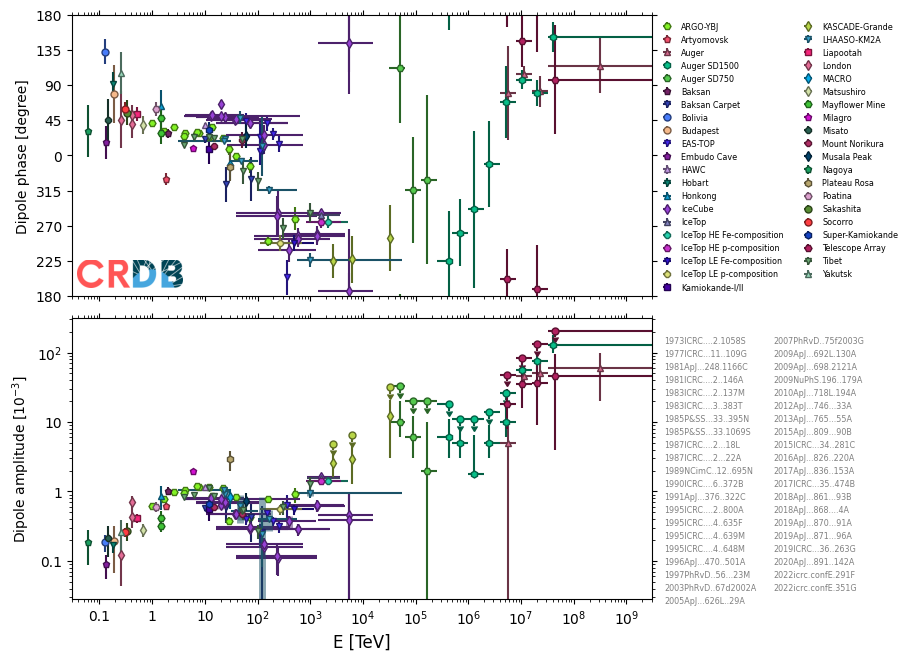

In [21]:
# crdb.query does not work yet with DipoleAmplitude and DipolePhase
tab = crdb.all()
tab = tab[(tab.quantity == "DipoleAmplitude") | (tab.quantity == "DipolePhase")]
exps = crdb.experiment_masks(tab)

# some random colors and symbols
rng = np.random.default_rng(1)
colors = rng.uniform(size=(len(exps), 3))
markers = ["o", "v", "^", "p", "h", "H", "d", "s", "8"]
markers = [rng.choice(markers) for _ in range(len(exps))]

fig, ax = plt.subplots(2, 1, figsize=(9, 6.5), sharex=True)

plt.sca(ax[0])
plt.ylim([-180, 180])
plt.ylabel(r"Dipole phase [degree]")

for (label, mask), marker, color in zip(exps.items(), markers, colors):
    t = tab[mask & (tab.quantity == "DipolePhase")]

    phase = (t.value + 180) % 360 - 180

    yerr = np.transpose(t.err_sta**2 + t.err_sys**2) ** 0.5
    xerr = np.abs(np.transpose(t.e_bin) - t.e)

    for shift in (-360, 0, 360):
        plt.errorbar(
            t.e / TeV,
            phase + shift,
            xerr=xerr / TeV,
            yerr=yerr,
            fmt=marker if shift == 0 else "none",
            color=color,
            ecolor=0.5 * color,
            markeredgecolor=0.5 * color,
            label=label if shift == 0 else None,
        )

    # TODO draw systematic error separately

plt.sca(ax[1])

for (_, mask), marker, color in zip(exps.items(), markers, colors):
    t = tab[mask & (tab.quantity == "DipoleAmplitude")]
    draw_table(
        t,
        factor=1e3,
        marker=marker,
        color=color,
        ecolor=0.5 * color,
        markeredgecolor=0.5 * color,
        show_bin=True,
        xunit=TeV,
    )

plt.loglog()
plt.ylabel(r"Dipole amplitude [$10^{-3}$]")
plt.xlabel(r"E [TeV]", fontsize="large")

ax[0].xaxis.set_major_locator(LogLocator(numticks=100))
ax[0].xaxis.set_minor_locator(LogLocator(subs="all", numticks=100))
ax[0].set_yticks(np.linspace(-180, 180, 9))
ax[0].yaxis.set_major_formatter(lambda val, _: f"{val % 360:.0f}")

ax[1].xaxis.set_major_formatter(format_ten_power)
ax[1].yaxis.set_major_formatter(format_ten_power)

plt.sca(ax[0])
plt.tick_params(which="both", top=True, right=True)
draw_logo(-0.01, 0.13)
plt.legend(
    bbox_to_anchor=(1, 1),
    fontsize="xx-small",
    loc="upper left",
    frameon=False,
    ncol=2,
)
plt.sca(ax[1])
plt.tick_params(which="both", top=True, right=True)
plt.xlim(0.03, 3e9)
draw_references(tab, bbox_to_anchor=(1.01, 0.96), ncol=2, loc="upper left")
if savefig:
    plt.savefig("figure/dipole.svg")
    plt.savefig("figure/dipole.pdf")